In [1]:
import mido
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

use https://mido.readthedocs.io/en/latest/ for midi management

In [2]:
mf = mido.MidiFile('cycle-test.mid')
#mf.ticks_per_beat = 960

First, plot the deltas to get a sense of what the legitimate spacing is so we can get an idea of how wide our window should be.

In [3]:
track = mf.tracks[0]

In [4]:
current_time = 0
note_ons = []
for i in range(len(track)):
    current_time = current_time + track[i].time
    #print("{}, time: {}".format(track[i], current_time))
    if(track[i].type == "note_on"):
        note_ons.append(current_time)

Why do the time values of the messages not seem to be affected by ticks_per_beat?

Should do according to https://mido.readthedocs.io/en/latest/midi_files.html#tempo-and-beat-resolution

(array([ 20.,  31.,  41.,  98., 168., 235., 296., 301., 283., 185., 126.,
         59.,  19.,  15.,   2.,   1.,   0.,   5.,   0.,   2.,   2.,   1.,
          1.,   1.,   1.,   1.,   1.,   0.,   0.,   1.,   1.,   0.,   0.,
          1.,   0.,   1.,   0.,   0.,   0.,   0.]),
 array([   0.,   25.,   50.,   75.,  100.,  125.,  150.,  175.,  200.,
         225.,  250.,  275.,  300.,  325.,  350.,  375.,  400.,  425.,
         450.,  475.,  500.,  525.,  550.,  575.,  600.,  625.,  650.,
         675.,  700.,  725.,  750.,  775.,  800.,  825.,  850.,  875.,
         900.,  925.,  950.,  975., 1000.]),
 <a list of 40 Patch objects>)

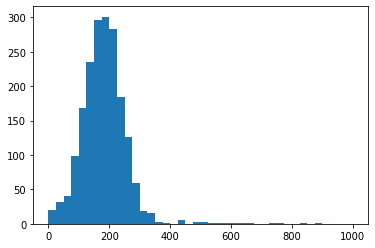

In [5]:
dt = np.diff(note_ons)
plt.hist(dt, range = (0, 1000), bins = 40)

Looks like we want our window to be < 400, maybe substantially less.